<a href="https://colab.research.google.com/github/Shazizan/portfolio/blob/main/codility_test_mercedes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
from google.colab import files
import pandas as pd

In [11]:
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving superstore.csv to superstore.csv


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Sales Trend by Month

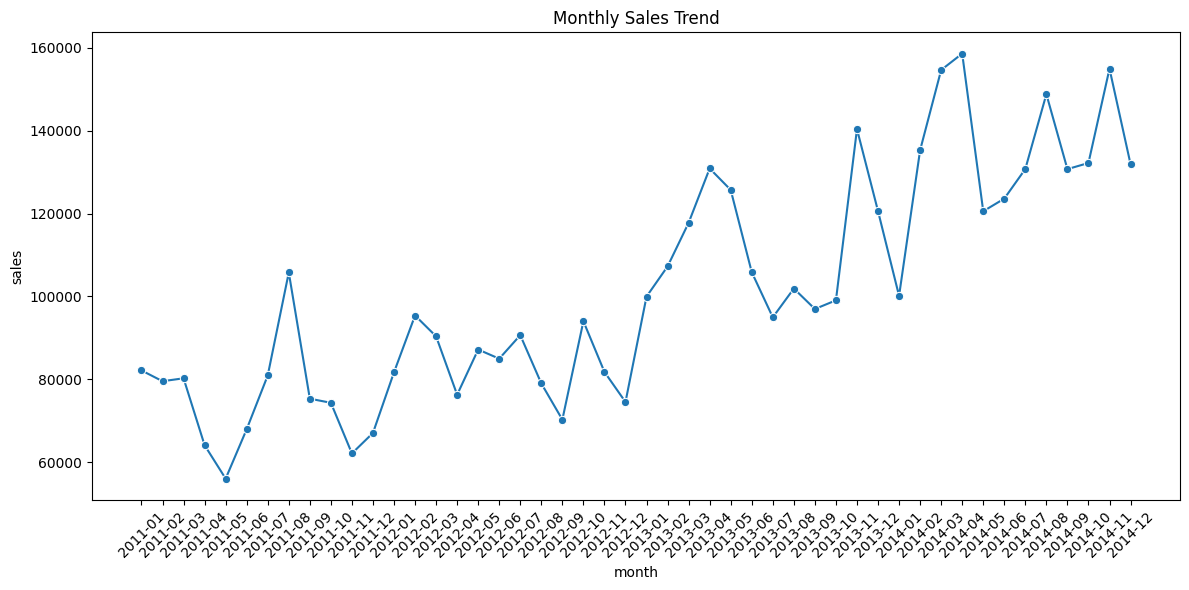

In [15]:
df['order_date'] = pd.to_datetime(df['order_date'], errors = 'coerce')
df['month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('month')['sales'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)

plt.figure(figsize = (12, 6))
sns.lineplot(x = 'month', y = 'sales', data = monthly_sales, marker = 'o')
plt.title('Monthly Sales Trend')
plt.xticks(rotation = 45, fontsize = 10)
plt.tight_layout()
plt.show()

Sales by Category

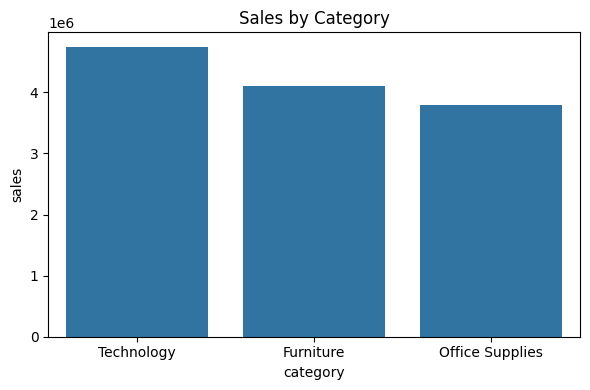

In [16]:
category_sales = df.groupby('category')['sales'].sum().nlargest(10).reset_index()

plt.figure(figsize = (6, 4))
sns.barplot(x = 'category', y = 'sales', data = category_sales)
plt.title('Sales by Category')
plt.tight_layout()
plt.show()

Top 10 Customers by Sales

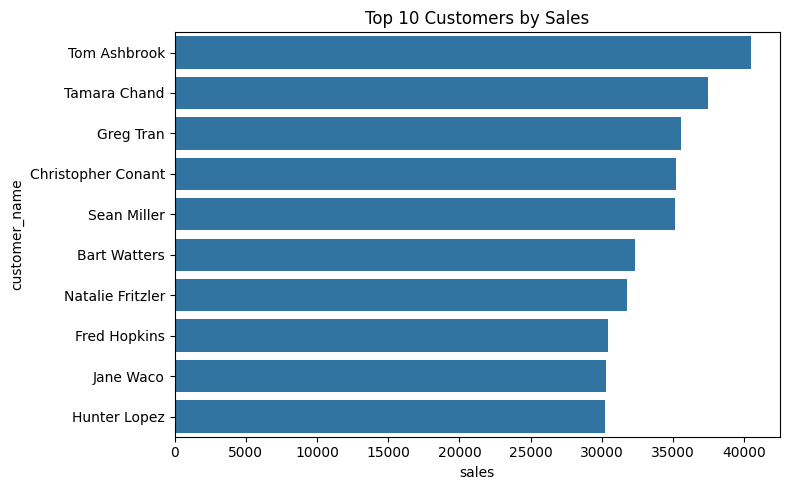

In [17]:
top_customers = df.groupby('customer_name')['sales'].sum().nlargest(10).reset_index()

plt.figure(figsize = (8, 5))
sns.barplot(x ='sales', y = 'customer_name', data = top_customers)
plt.title('Top 10 Customers by Sales')
plt.tight_layout()
plt.show()

profit vs sales scatter plot

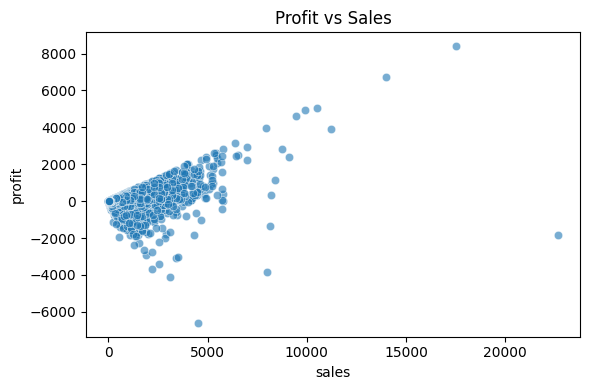

In [18]:
#profit vs sales scatter plot

plt.figure(figsize = (6, 4))
sns.scatterplot(x ='sales', y = 'profit', data = df, alpha = 0.6)
plt.title('Profit vs Sales')
plt.tight_layout()
plt.show()